# Causal inference in multisensory perception
### Paola Suárez and Jiameng Wu

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats.distributions as dists
import itertools
import matplotlib.cm as cm
import matplotlib.colors as colors
import itertools
#import scipy.optimize as op

%matplotlib inline

## 1. Implement the model

### Probability of a common cause

In [59]:
# Default parameters
p_com0 = 0.8
sigma_v0 = 0.6
sigma_a0 = 3.1
sigma_p0 = 15
mu_p = 0

In [60]:
def prob_C1(x_v, x_a, sigma_v=sigma_v0, sigma_a=sigma_a0, sigma_p=sigma_p0, p_com=p_com0, mu_p=mu_p):
    """
    Inference of the ideal observer of the probability of a common cause given noisy stimuli p(C = 1|xv,xa)
    """
    denominator = ( sigma_v**2 * sigma_a**2 + \
                    sigma_v**2 * sigma_p**2 + \
                    sigma_a**2 * sigma_p**2 )
    
    cond_C1 = np.exp(-.5 * \
                         ((x_v - x_a)**2 * sigma_p**2 + \
                          (x_v - mu_p)**2 * sigma_a**2 + \
                          (x_a - mu_p)**2 * sigma_v**2) / \
                         denominator) / \
              (2*np.pi*np.sqrt(denominator))
        
    cond_C2 = np.exp(-.5 * \
                        ((x_v - mu_p)**2 / (sigma_v**2 + sigma_p**2) + \
                         (x_a - mu_p)**2 / (sigma_a**2 + sigma_p**2))) / \
              (2*np.pi*np.sqrt( \
                          (sigma_v**2 + sigma_p**2) * \
                          (sigma_a**2 + sigma_p**2)))
        
    p_C1 = cond_C1 * p_com / (cond_C1 * p_com + cond_C2 * (1-p_com))
    
    return p_C1, x_v-x_a

In [4]:
# Position values
pos = np.array([-12, -6, 0, 6, 12])

In [5]:
# Noisy stimuli
n = 10
x = np.linspace(pos.min(), pos.max(), n*(pos.max() - pos.min())+1)
x_v, x_a = np.meshgrid(x, x)
x_v = x_v.reshape(len(x)**2)
x_a = x_a.reshape(len(x)**2)

In [6]:
# Obtain probs
p_C1s, disparity = prob_C1(x_v, x_a)

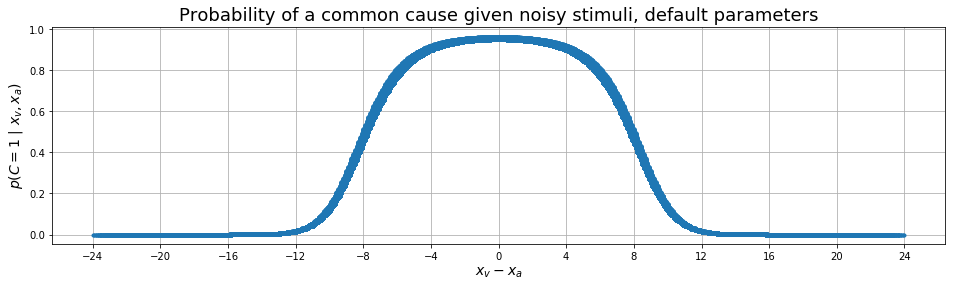

In [7]:
# Visualize
plt.figure(figsize=(16,4))
plt.plot(disparity, p_C1s, '.')
plt.title("Probability of a common cause given noisy stimuli, default parameters", size=18)
plt.xlabel(r'$x_v - x_a$', size=14)
plt.ylabel(r'$p(C=1\ |\ x_v, x_a)$', size=14)
plt.xticks(np.linspace(2*pos.min(),2*pos.max(),13))
plt.grid()
plt.show()

In general, the probability of a common cause increases with decreasing disparity between the visual and auditory stimuli. Using the default parameters, we obtained the graph above where the maximal value of $p(C=1\ |\ x_v, x_a)$ is close to 1 and found at disparity = 0. Moving the two noisy stimuli further apart from each other results in increasing disparity and so does the probability of separate causes, $p(C=2\ |\ x_v, x_a)$, increase. 

One further remark on the plot is that the same disparity value can result in slightly different values of $p(C=1\ |\ x_v, x_a)$. This is due to the calculation of the $p(C=1\ |\ x_v, x_a)$ (see Eq. 2 in the paper), as it does not only depend on the difference between $x_v$ and $x_a$, but also takes into account their absolute values.

### Change parameters and explain

In [8]:
# Vary p_com separately
p_C1s_v1 = []
p_coms = np.linspace(0, 1, 6)
for p_com in p_coms:
    p_C1s, disparity = prob_C1(x_v, x_a, p_com=p_com)
    p_C1s_v1.append(p_C1s)
    
# Vary sigma_v separately
p_C1s_v2 = []
sigma_vs = [0.1, 0.5,  1., 3., 5.]
for sigma_v in sigma_vs:
    p_C1s, disparity = prob_C1(x_v, x_a, sigma_v=sigma_v)
    p_C1s_v2.append(p_C1s)
    
# Vary sigma_a separately
p_C1s_v3 = []
sigma_as = [0.1, 1.5, 3.5, 5.5]
for sigma_a in sigma_as:
    p_C1s, disparity = prob_C1(x_v, x_a, sigma_a=sigma_a)
    p_C1s_v3.append(p_C1s)
    
# Vary sigma_p separately
p_C1s_v4 = []
sigma_ps = [0.5, 1, 5, 10, 15, 24]
for sigma_p in sigma_ps:
    p_C1s, disparity = prob_C1(x_v, x_a, sigma_p=sigma_p)
    p_C1s_v4.append(p_C1s)

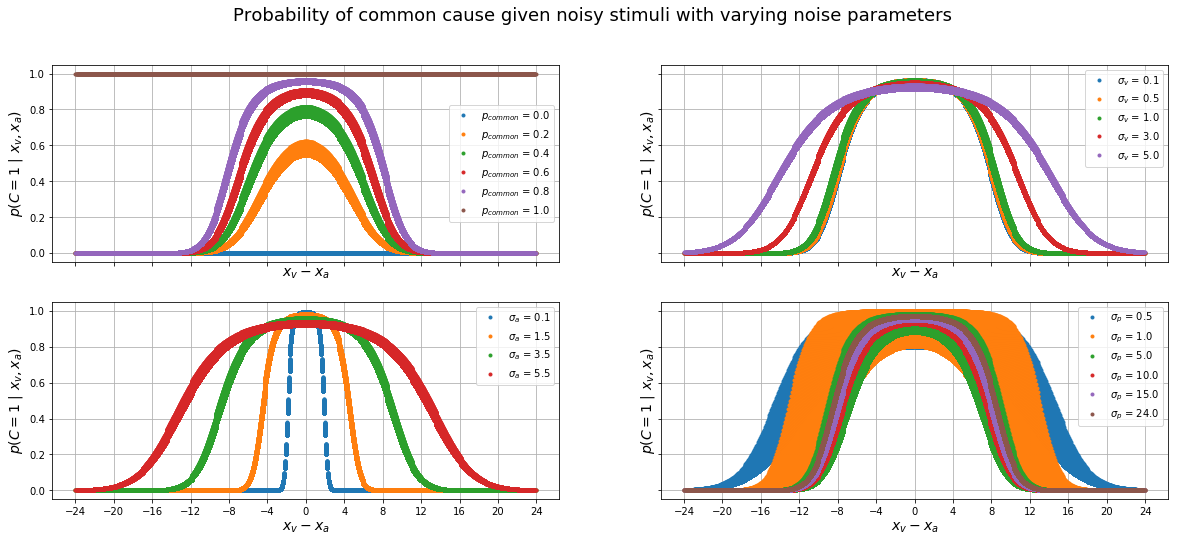

In [9]:
# Visualize
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(20,8))
axes = axes.ravel()
params = [p_coms, sigma_vs, sigma_as, sigma_ps]
labels = [r'$p_{common}$', r'$\sigma_v$', r'$\sigma_a$', r'$\sigma_p$']
for j, p_C1s_v in enumerate([p_C1s_v1, p_C1s_v2, p_C1s_v3, p_C1s_v4]):
    for i, p_C1s in enumerate(p_C1s_v):
        axes[j].plot(disparity, p_C1s, '.', label=str(labels[j])+" = %.1f"%params[j][i])
    #axes[j].set_title("Probability of a common cause given noisy stimuli, change sigma_a", size=18)
    axes[j].set_xlabel(r'$x_v - x_a$', size=14)
    axes[j].set_ylabel(r'$p(C=1\ |\ x_v, x_a)$', size=14)
    axes[j].set_xticks(np.linspace(2*pos.min(),2*pos.max(),13))
    axes[j].legend()
    axes[j].grid()
plt.suptitle('Probability of common cause given noisy stimuli with varying noise parameters', size=18)
plt.show()

#### Effect of $p(C=1\ |\ x_v, x_a)$ while varying parameters

** In general, we vary both $x_v$ and $x_a$ values to produce the whole range of $x_v - x_a$. As also the absolute values of $x_v$ and $x_a$ (not only the difference) enter the calculation for the $p(C=1\ |\ x_v, x_a)$, we see that the same $x_v - x_a$ value can generally result in different $p(C=1\ |\ x_v, x_a)$ values.**

** $p_{common}$ - ** With larger $p_{common}$ the probability of having a common cause increases. The extreme values of $p_{common}$ are zero and one, determining a total probability of separate causes and a total probability of common causes, irrespective of the disparity of the two stimuli. For intermediate values, higher $p_{common}$ values result in higher peaks and more "flat-topped" shape. Comparing with other parameters, $p_{common}$ dominantly determines the peak value of the probability distribution.

** $\sigma_{v}$ - ** Higher values for $\sigma_{v}$ mean higher uncertainty in predicting the location of the visual stimulus. Naturally, it influences the certainty of judging whether or not the visual and auditory stimuli underly a common cause. This is reflected in the variance of the distribution for $p(C=1\ |\ x_v, x_a)$. 

** $\sigma_{a}$ - ** Similar effects are found for varying the noise in the auditory stimulus. As the default value of $\sigma_{v}$ is very small (0.6), when $\sigma_{a}$ is set to a small value (i.e. we are accurate in perceiving the location of the stimulus in both modalities), a narrow distribution for $p(C=1\ |\ x_v, x_a)$ is observed.

** $\sigma_{p}$ - ** The $\sigma_{p}$ models the central bias. A low value means that stimuli are more likely to occur in the central position. Higher values mean higher spread of the stimuli. By looking at the Eq. 4 in the paper more closely, one finds that with low $\sigma_{p}$ (orange, blue), the conditional probability of a common cause is not influenced by the disparity, but rather by the absolute values of $x_v$ and $x_a$. This explains why the same disparity values can result in both low and high values of $p(C=1\ |\ x_v, x_a)$ (thick orange and blue "lines"), as the $x_v$ and $x_a$ can take on different values. Furthermore, low $x_v - x_a$ would always result in high $p(C=1\ |\ x_v, x_a)$, as they are very likely to appear at the same central location. With higher $\sigma_p$ values, the $p(C=1\ |\ x_v, x_a)$ is more clearly determined by the disparity (thin "lines"). 

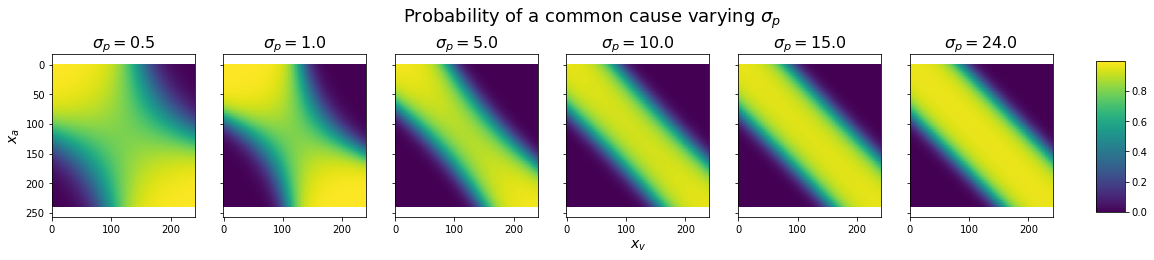

In [10]:
# What is happening with sigma_p?
vmin, vmax = np.min(p_C1s_v4), np.max(p_C1s_v4)

fig, axes = plt.subplots(1, 6, sharex=True, sharey=True, figsize=(20,3))
axes = axes.ravel()
for i, p_C1s in enumerate(p_C1s_v4):
    p_C1s = p_C1s.reshape(len(x), len(x))
    axes[i].imshow(p_C1s, vmin=vmin, vmax=vmax)
    axes[i].set_title(r"$\sigma_p = %.1f$" %sigma_ps[i], size=16)
axes[0].set_ylabel(r"$x_a$", size=14)
axes[3].set_xlabel(r"$x_v$", size=14)

fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
norm =  colors.Normalize(vmin=vmin, vmax=vmax)
s_m =  cm.ScalarMappable(norm=norm)
s_m.set_array(np.linspace(vmin, vmax))
fig.colorbar(s_m, cax=cbar_ax)

fig.suptitle(r"Probability of a common cause varying $\sigma_p$", size=18, y=1.1)
plt.show()

** $\sigma_{p}$ - ** This plot further illustrates the effect of $\sigma_p$ on the influence of the disparity on $p(C=1\ |\ x_v, x_a)$. On the diagonals, $x_v - x_a$ is constant while $x_v$ and $x_a$ vary. We see that with low $sigma_p$ values, the values for $p(C=1\ |\ x_v, x_a)$ change a lot, althought the disparity stays the same. 

### Estimate stimulus position

In [11]:
def estimates(x_v, x_a, sigma_v=sigma_v0, sigma_a=sigma_a0, sigma_p=sigma_p0, p_com=p_com0):
    """
    The optimal estimate of the stimuli's position is the one that minimizes the mean expected squared error.
    """
    p_C1, _ = prob_C1(x_v, x_a, sigma_v, sigma_a, sigma_p, p_com)
    
    s_v_C1 = (x_v/sigma_v**2 + x_a/sigma_a**2 + mu_p/sigma_p**2) / \
             (1/sigma_v**2 + 1/sigma_a**2 + 1/sigma_p**2)
            
    s_a_C1 = s_v_C1
    
    s_v_C2 = (x_v/sigma_v**2 + mu_p/sigma_p**2) / \
             (1/sigma_v**2 + 1/sigma_p**2)
        
    s_a_C2 = (x_a/sigma_a**2 + mu_p/sigma_p**2) / \
             (1/sigma_a**2 + 1/sigma_p**2)
    
    est_v = p_C1 * s_v_C1 + (1 - p_C1)*s_v_C2
    est_a = p_C1 * s_a_C1 + (1 - p_C1)*s_a_C2
    
    return est_v, est_a

In [12]:
# Assume x_a is fixed at 0
x_a = 0
x_v = x.copy()

est_v, est_a = estimates(x_v, x_a)

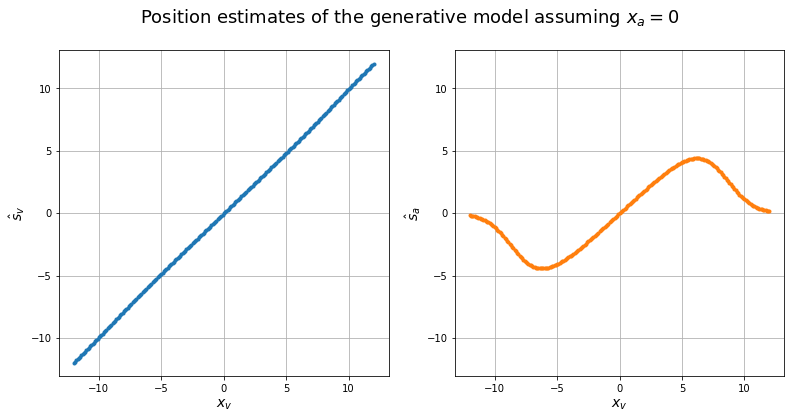

In [13]:
# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))
fig.suptitle(r"Position estimates of the generative model assuming $x_a=0$", size=18)
ax1.plot(x_v, est_v, '.C0')
ax1.axis('equal')
ax1.set_xlabel(r'$x_v$', size=14)
ax1.set_ylabel(r'$\hat{s}_v$', size=14)
ax1.grid()

ax2.plot(x_v, est_a, '.C1')
ax2.axis('equal')
ax2.set_xlabel(r'$x_v$', size=14)
ax2.set_ylabel(r'$\hat{s}_a$', size=14)
ax2.grid()
plt.show()

When varying the $x_v$ and keeping the $x_a$ at the central position, we see that using default parameters, the visual estimate is highly accurate, but the the auditory estimate is biased by the estimate of the visual stimulus, as the probability of a common cause is quite high ($p_{common}= 0.8$) and the noise in the auditory modality higher than in the visual ($\sigma_a = 3.1$, $\sigma_v = 0.6$). For $x_v$ close to the center a common cause is assumed and the visual estimate influences the auditory one. But for $x_v$ further away, separate causes are more likely and the auditory estimate is less biased, hence it decreases back to zero. 

In [14]:
# Vary p_com separately
estims_v1 = []
p_coms = np.linspace(0, 1, 6)
for p_com in p_coms:
    est_v, est_a = estimates(x_v, x_a, p_com=p_com)
    estims_v1.append([est_v, est_a])
    
# Vary sigma_v separately
estims_v2 = []
sigma_vs = [0.1, 0.5,  1., 3., 5.]
for sigma_v in sigma_vs:
    est_v, est_a = estimates(x_v, x_a, sigma_v=sigma_v)
    estims_v2.append([est_v, est_a])
    
# Vary sigma_a separately
estims_v3 = []
sigma_as = [0.1, 1.5, 3.5, 5.5]
for sigma_a in sigma_as:
    est_v, est_a = estimates(x_v, x_a, sigma_a=sigma_a)
    estims_v3.append([est_v, est_a])
    
# Vary sigma_p separately
estims_v4 = []
sigma_ps = [0.5, 1, 5, 10, 15, 24]
for sigma_p in sigma_ps:
    est_v, est_a = estimates(x_v, x_a, sigma_p=sigma_p)
    estims_v4.append([est_v, est_a])

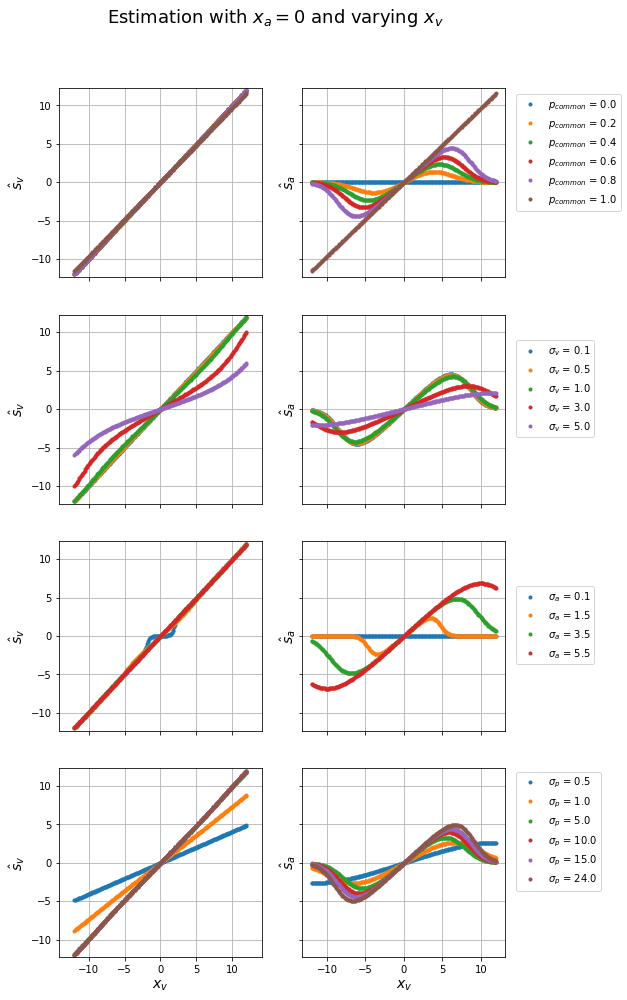

In [15]:
# Visualize
fig, axes = plt.subplots(4, 2, sharex="col", sharey=True, figsize=(8,16))
params = [p_coms, sigma_vs, sigma_as, sigma_ps]
labels = [r'$p_{common}$', r'$\sigma_v$', r'$\sigma_a$', r'$\sigma_p$']
for j, estims in enumerate([estims_v1, estims_v2, estims_v3, estims_v4]):
    for i, (est_v, est_a) in enumerate(estims):
        axes[j,0].plot(x_v, est_v, '.', label=str(labels[j])+" = %.1f"%params[j][i])
        axes[j,1].plot(x_v, est_a, '.', label=str(labels[j])+" = %.1f"%params[j][i])
    axes[j,0].set_ylabel(r'$\hat{s}_v$', size=14)
    axes[j,1].set_ylabel(r'$\hat{s}_a$', size=14)
    axes[j,0].axis('equal')
    axes[j,1].axis('equal')
    axes[j,1].legend(loc=(1.05, 0.35))
    #axes[j,1].legend()
    axes[j,0].grid()
    axes[j,1].grid()
axes[j,0].set_xlabel(r'$x_v$', size=14)
axes[j,1].set_xlabel(r'$x_v$', size=14)
plt.suptitle(r'Estimation with $x_a=0$ and varying $x_v$', y=.95, size=18)
plt.show()

#### Effect of $\hat{s}_v, \hat{s}_a$ while varying parameters

** **

** $p_{common}$ - ** As explained in the default estimates figure, $x_v$ influences the auditory estimates accoriding to the probability of a common cause. The higher this probability, the stronger the bias.

** $\sigma_{v}$ - ** When we increase $\sigma_{v}$, we become less certain about the visual stimulus and this allows an influence of the auditory estimate on the visual estimate.

** $\sigma_{a}$ - ** The bias of the visual estimate on the auditory estimate increases with uncertainty in the auditory perception. When $\sigma_a$ is smaller than $\sigma_v$, the direction of the bias is reversed. The direction is purely determined by the the certainty of perception in the two modalities the ideal observer has. 

** $\sigma_{p}$ - ** $\sigma_p$ basically influences the slope of the graphs. With stronger central bias (low $\sigma_p$ values), the ideal observer would estimate all stimuli to be more in the center. 

### Predicted distribution of visual positions through marginalization

#### How you might evaluate the integral $p(\hat{s}_v | s_v, s_a) = \int\int p(\hat{s}_v | x_v, x_a) p(x_v | s_v) p(x_a | s_a) dx_v dx_a$ ?

One solution for this integral is to discretize the continuous variables $x_v$ and $x_a$. This would allow us to replace the double integral by a double sum and to evaluate the conditional probabilities within the integrals in a discretized way. This purely analytical approach doesn't make any sense if we want to compare the response distributions with experimental data, as in that case $x_v$ and $x_a$ model the internal representation of the stimuli locations in the subjects. The parameters are not accessible to us. The best way to obtain the response probability is to simulate many trials and compute histograms that tell how often a response is picked given certain true signals. 

#### What kind of function is $p(\hat{s}_v | x_v, x_a)$ ? How does it affect the analytical evaluation of the integral?

This is a discrete probability distribution conditioned on two continuous variables. First of all, $x_v$ and $x_a$ would need to be discretized for the conditional probability to be calculated. This is not useful as they are the internal representation of the true stimuli in the subjects, i.e. they are not accessible. Second, the causal inference model is deterministic, once given the noisy stimuli $x_v$ and $x_a$. This means, a pair of $x_v$ and $x_a$ will always yield the same estimate. Thus, the conditional probabilities are delta functions centered at the particular estimates. So there is no need to estimate it.

#The analytical evaluation would fail to take into account the discretization a subject would do as she has to decide for one out of five buttons. The fact that different amount of $x_v$ / $x_a$ values are binned for the individual buttons (e.g. for -12 and +12 there are more $x_v$ / $x_a$ values than for -6, 0, +6), the response distribution  

#Summing over these conditional probability distributions will result in a distribution that reflects the prior distribution of the variables $x_v$ and $x_a$.  

### Numerical method for obtaining estimates

In [77]:
sigma_v0 = 0.6
samples = 10000 #1e4
x_v = np.random.normal(pos, sigma_v0, size=(samples,len(pos)))#.reshape(samples*len(pos))
x_a = np.random.normal(0, sigma_a0, size=(samples, len(pos)))

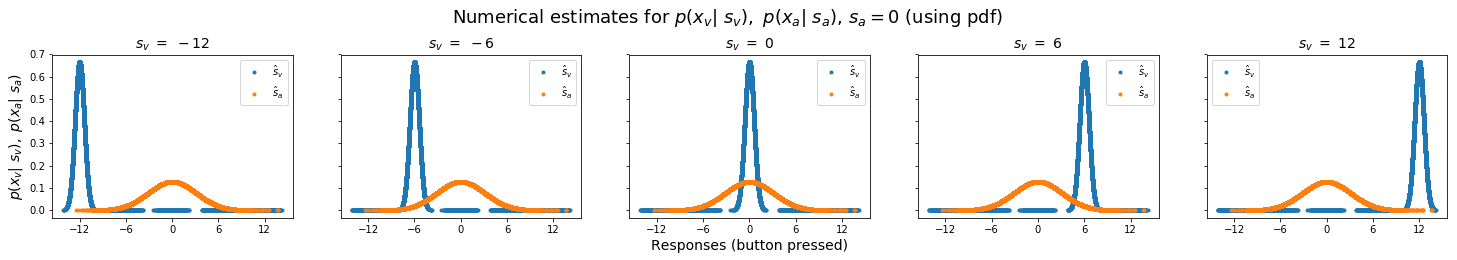

In [78]:
pdf_x_v = []
pdf_x_a = []
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(25,3))
for i in range(len(pos)):
    pdf_v = dists.norm.pdf(x_v.reshape(samples*len(pos)), loc=pos[i], scale=sigma_v0)
    pdf_a = dists.norm.pdf(x_a.reshape(samples*len(pos)), loc=0, scale=sigma_a0)
    pdf_x_v.append(pdf_v)
    pdf_x_a.append(pdf_a)
    axes[i].plot(x_v.reshape(samples*len(pos)), pdf_v,'.', label=r'$\hat{s}_v$')
    axes[i].plot(x_a.reshape(samples*len(pos)), pdf_a, '.', label=r'$\hat{s}_a$')
    axes[i].legend()
    axes[i].set_title(r'$s_v\ =\ %d$'%pos[i], size=14)
    axes[i].set_xticks(pos)
axes[0].set_ylabel(r'$p(x_v\|\ s_v),\  p(x_a|\ s_a)$', size=14)
axes[2].set_xlabel('Responses (button pressed)', size=14)
plt.suptitle(r'Numerical estimates for $p(x_v\|\ s_v),\  p(x_a|\ s_a)$, $s_a = 0$ (using pdf)', y=1.1, size=18)
plt.show()

This additional plot shows how often a (discretized) $x_v$ / $x_a$ value occurs given a certain true source. The function scipy.norm.pdf() is used to obtain the distributions, assuming a Gaussian noise for both modalities.

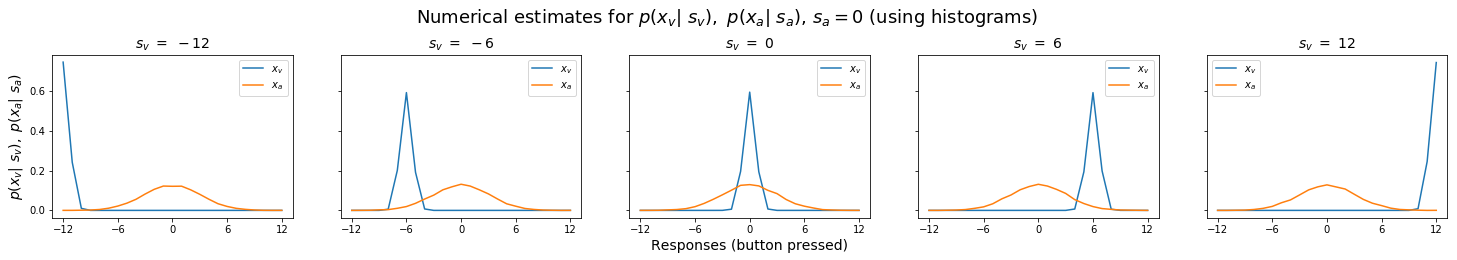

In [79]:
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(25,3))
for i in range(len(pos)):
    hist_v, _ = np.histogram(x_v[:,i], bins=np.linspace(-12.5,12.5,26), density=True)
    #print(np.shape(hist_v))
    #print(np.sum(hist_v))
    hist_a, _ = np.histogram(x_a[:,i], bins=np.linspace(-12.5,12.5,26), density=True)
    #print(np.shape(hist_a))
    axes[i].plot(np.linspace(-12,12,25), hist_v, label=r'$x_v$')
    axes[i].plot(np.linspace(-12,12,25), hist_a, label=r'$x_a$')
    axes[i].legend()
    axes[i].set_title(r'$s_v\ =\ %d$'%pos[i], size=14)
    axes[i].set_xticks(pos)
axes[0].set_ylabel(r'$p(x_v\|\ s_v),\  p(x_a|\ s_a)$', size=14)
axes[2].set_xlabel('Responses (button pressed)', size=14)
plt.suptitle(r'Numerical estimates for $p(x_v\|\ s_v),\  p(x_a|\ s_a)$, $s_a = 0$ (using histograms)', y=1.1, size=18)
plt.show()

This additional plot shows how often a (discretized) $x_v$ / $x_a$ value occurs given a certain true source. The function np.histogram() is used to obtain the distributions. We found this method better, as it doesn't assume any specific distributions.

In [80]:
# Estimate
est_v, est_a = estimates(x_v, x_a)

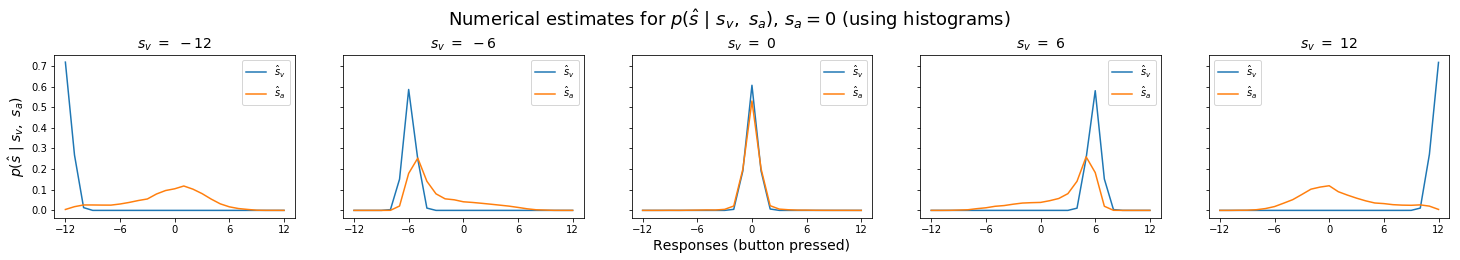

In [82]:
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(25,3))
for i in range(len(pos)):
    est_v, est_a = estimates(x_v[:,i], x_a[:,i])
    hist_v, _ = np.histogram(est_v, bins=np.linspace(-12.5,12.5,26), density=True)
    #print(np.shape(hist_v))
    #print(np.sum(hist_v))
    hist_a, _ = np.histogram(est_a, bins=np.linspace(-12.5,12.5,26), density=True)
    #print(np.shape(hist_a))
    axes[i].plot(np.linspace(-12,12,25), hist_v, label=r'$\hat{s}_v$')
    axes[i].plot(np.linspace(-12,12,25), hist_a, label=r'$\hat{s}_a$')
    axes[i].legend()
    axes[i].set_title(r'$s_v\ =\ %d$'%pos[i], size=14)
    axes[i].set_xticks(pos)
axes[0].set_ylabel(r'$p(\hat{s}\ |\ s_v,\ s_a)$', size=14)
axes[2].set_xlabel('Responses (button pressed)', size=14)
plt.suptitle(r'Numerical estimates for $p(\hat{s}\ |\ s_v,\ s_a)$, $s_a = 0$ (using histograms)', y=1.1, size=18)
plt.show()

Numerical estimates for the response distributions conditioned on the true sources are obtained with np.histogram(). We didn't understand how to use a heat-map for these plots, but we consider the plots above as sufficient to convey the information. 

The plot shows how the causal inference model shapes the estimates. When the sources are equal ($s_v = s_a = 0$) both estimates are very similar, given the high conditional probability of a common cause. When the disparity between sources is low ($\ |s_v - s_a | \ < \ 6 \ $) we can still observe a visual bias on the auditory estimate. However, if the disparity is high ($\ |s_v - s_a | \ > \ 6 \ $), the conditional probability of separate causes increases and the estimates are treated as two different ones. A last remark is that the variance of the auditory estimate is large for the separate sources case; i.e. the visual bias still has an effect.

In general, we can observe that the model succeeds in predicting the non-linear combination of estimates, given a common or separate cause.

## 2. Fit the model to experimental data

### Generative model

In [21]:
def cont_to_disc(s):
    """
    Convert continuos variables (x_v, x_a to discrete according to the buttons that can be pressed.
    """
    intervals = [-1000, -9, -3, 3, 9, 1000]
    s_disc = s.copy()
    for i in range(len(intervals)-1):
        a, b = intervals[i], intervals[i+1]
        mask = (a <= s) & (s < b)
        #a, b = intervals[i], intervals[i+1]
        #mask = np.logical_and(np.abs(b) < np.abs(s), np.abs(s)<=np.abs(a))
        s_disc[mask] = pos[i]
    return s_disc

In [22]:
def generate_sources(samples=10000, sigma_p=sigma_p0, p_com=p_com0):
    """
    Generate a set of sources as described by Körding et al., 2007
    """
    # Determine C=1 or C=2
    C = np.random.binomial(1, p_com, size=samples)
    num_C1 = C.sum()
    num_C2 = samples - num_C1
    
    # Draw one position for common cause, two for independent causes
    s = np.random.normal(0, sigma_p, 2*samples)
    
    # Generate sources
    s = cont_to_disc(s)

    # Estimulus pairs (s_v, s_a)(think spanish!)
    source_v = np.concatenate((s[:num_C1], s[num_C1:num_C1+num_C2]))
    source_a = np.concatenate((s[:num_C1], s[num_C1+num_C2:num_C1+2*num_C2]))
    
    return source_v, source_a, num_C1

In [72]:
# Set of stimulus pairs
s_v0, s_a0, _ = generate_sources()

It appears that the default parameters are very broad (the sigma_p=15) and this makes the histograms skewed towards the -12 and 12

In [73]:
# Try different sigma_p
s_v, s_a, _ = generate_sources(sigma_p=5)

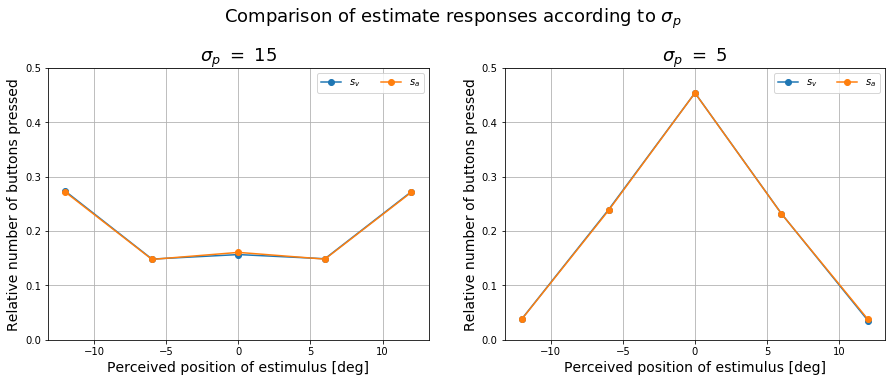

In [75]:
to_plot = [[s_v0, s_a0], [s_v, s_a]]

title = [r"$\sigma_p\ =\ %d$"%sigma_p0, r"$\sigma_p\ =\ %d$"%5]
plt.figure(figsize=(15,5))
for i, source in enumerate(to_plot):
    hist_v, _ = np.histogram(source[0], bins=np.linspace(-12.5,12.5,26), density=True)
    hist_a, _ = np.histogram(source[1], bins=np.linspace(-12.5,12.5,26), density=True)
    plt.subplot(1,2,i+1)
    plt.plot(np.linspace(-12,12,5), hist_v[hist_v!=0], "o-", label=r'$s_v$')
    plt.plot(np.linspace(-12,12,5), hist_a[hist_a!=0], "o-", label=r'$s_a$')
    plt.title(title[i], size=18)
    plt.xlabel("Perceived position of estimulus [deg]", size=14)
    plt.ylabel("Relative number of buttons pressed", size=14)
    plt.legend(ncol=2)
    plt.ylim(0,0.5)
    plt.grid()
plt.suptitle(r"Comparison of estimate responses according to $\sigma_p$", y=1.05, size=18)
plt.show()

Another extra plot to observe the influence of $\sigma_p$ in the generation of sources. For further details refer to section: **Effect of $p(C=1\ |\ x_v, x_a)$ while varying parameters**

### Position estimates must be discrete

In [26]:
def sources_to_inputs(s_v, s_a, sigma_v=sigma_v0, sigma_a=sigma_a0):
    """
    Take one pair of sources and transformed them into noisy inputs.
    """
    x_v = np.random.normal(s_v, sigma_v)
    x_a = np.random.normal(s_a, sigma_a)
    return x_v, x_a

In [27]:
def plot_button_presses(press_v, press_a, num_C1):
    """
    Verify that the button presses are correct following histograms method.
    """
    # Histograms for common source
    hist_v_1, _ = np.histogram(press_v[:num_C1], bins=np.linspace(-12.5,12.5,26), density=True)
    hist_a_1, _ = np.histogram(press_a[:num_C1], bins=np.linspace(-12.5,12.5,26), density=True)
    # Histograms for separate sources
    hist_v_2, _ = np.histogram(press_v[num_C1:], bins=np.linspace(-12.5,12.5,26), density=True)
    hist_a_2, _ = np.histogram(press_a[num_C1:], bins=np.linspace(-12.5,12.5,26), density=True)
    to_plot = [[hist_v_1, hist_a_1], [hist_v_2, hist_a_2]]
    
    title = ["Common source (C=1)", "Independent source (C=2)"]
    
    plt.figure(figsize=(15,5))
    for i, (hist_v, hist_a) in enumerate(to_plot):
        plt.subplot(1,2,i+1)
        plt.plot(np.linspace(-12,12,5), hist_v[hist_v!=0], "o-", label=r'$\hat{s}_v$')
        plt.plot(np.linspace(-12,12,5), hist_a[hist_a!=0], "o-", label=r'$\hat{s}_a$')
        plt.title(title[i], size=18)
        plt.xlabel("Perceived position of estimulus [deg]", size=14)
        plt.ylabel("Relative number of buttons pressed", size=14)
        plt.legend(ncol=2)
        plt.ylim(0,0.5)
        plt.grid()
    plt.show()

In [28]:
def most_awesome_plot(hist_v, hist_a):
    """
    Plots a figure similar to Körding et al., 2007 - Fig 2c.
    """
    fig, axes = plt.subplots(6, 6, sharex=True, sharey=True, figsize=(10,10))
    for iv, v in enumerate(pos):
        for ia, a in enumerate(pos):
            axes[iv,ia+1].plot(pos, hist_v[iv*len(pos)+ia], label='Visual')
            axes[iv,ia+1].plot(pos, hist_a[iv*len(pos)+ia], label='Auditory') 
            axes[iv,ia+1].axis('off')

        pos_list = list(pos)
        _ = pos_list.pop(iv)

        axes[-1,iv+1].scatter(pos_list, [.1]*4, marker='o', s=60, c='C1')
        axes[iv,0].scatter(pos_list, [.1]*4, marker='o', s=60, c='C0')

        axes[-1,iv+1].scatter(pos[iv], .1, marker=(5,1), s=120, c='C1')
        axes[iv,0].scatter(pos[iv], .1, marker=(5,1), s=120, c='C0')

        axes[-1,iv+1].axis('off')
        axes[iv,0].axis('off')


    axes[-1,0].plot(-12, 0, markersize=0, label='Visual', c='C0')
    axes[-1,0].plot(-12, 0, markersize=0, label='Auditory', c='C1') 
    axes[-1,0].legend(bbox_to_anchor=(1, 1), fontsize='small')

    axes[-1,0].spines['right'].set_visible(False)
    axes[-1,0].spines['top'].set_visible(False)
    axes[-1,0].yaxis.set_ticks_position('left')
    axes[-1,0].xaxis.set_ticks_position('bottom')
    axes[-1,0].set_xticks(pos)
    axes[-1,0].set_yticks([0, 1])

    plt.show()

In [29]:
def make_button_presses(samples=10000, sigma_v=sigma_v0, sigma_a=sigma_a0, sigma_p=sigma_p0, p_com=p_com0, plot=True):
    """
    Ideal observer
    """
    # Set of stimulus pairs
    s_v, s_a, num_C1 = generate_sources(samples, sigma_p, p_com)
    
    # Noisy inputs
    x_v, x_a = sources_to_inputs(s_v, s_a, sigma_v, sigma_a)
    
    # Estimates
    est_v, est_a = estimates(x_v, x_a, sigma_v, sigma_a, sigma_p, p_com)
    
    # Make presses
    press = cont_to_disc(np.concatenate((est_v, est_a)))
    press_v, press_a = press[:samples], press[samples:]
    
    # Obtain histograms
    p_v = np.zeros((len(pos)*len(pos), len(pos)))
    p_a = p_v.copy()
    n_v = p_v.copy()
    n_a = p_v.copy()
    for iv, v in enumerate(pos):
        for ia, a in enumerate(pos):
            index = (s_v==v) & (s_a==a)
            n = index.sum()
            # Clause for NaNs
            if n!=0:
                n_v[iv*len(pos)+ia,:], _ = np.histogram(press_v[index], bins=np.linspace(-15,15,6)) 
                n_a[iv*len(pos)+ia,:], _ = np.histogram(press_a[index], bins=np.linspace(-15,15,6))
                p_v[iv*len(pos)+ia,:] = n_v[iv*len(pos)+ia,:] / n
                p_a[iv*len(pos)+ia,:] = n_a[iv*len(pos)+ia,:] / n
    
    if plot:
        #plot_button_presses(press_v, press_a, num_C1)
        most_awesome_plot(p_v, p_a)
        
    #return np.array(p_v), np.array(p_a), np.array(n_v), np.array(n_a)
    return p_v, p_a, n_v, n_a

In [30]:
# important global variables for the pro function!

# compute all conditions & broadcast
conditions = np.array(tuple(itertools.product(pos, pos)))

# numbers to add to the presses to separate them by values of 100
steps0 = np.arange(0, len(conditions)*100, 100)

# the bins for the histogram
# bins = np.linspace(-15,15,6)
# bins = np.array([bins] * len(conditions)) + steps0.reshape(-1,1)
# bins = np.concatenate(bins)
bins = np.linspace(-15,15,6)
bins = np.tile(bins, len(conditions)) + np.repeat(steps0, 6)

def generate_mask(s_v, s_a):
    dump1 = np.repeat(conditions[:,0], len(s_v))
    dump2 = np.repeat(conditions[:,1], len(s_v))
    
    steps = np.repeat(steps0, len(s_v))

    #s_v5 = np.concatenate([s_v]*len(conditions))
    #s_a5 = np.concatenate([s_a]*len(conditions))
    s_v5 = np.tile(s_v, len(conditions))
    s_a5 = np.tile(s_a, len(conditions))

    most_beautiful_mask = (s_v5 == dump1) & (s_a5 == dump2)
    return most_beautiful_mask, steps

In [31]:
def make_button_presses_pro(samples=10000, sigma_v=sigma_v0, sigma_a=sigma_a0, sigma_p=sigma_p0, p_com=p_com0, plot=True):
    """
    Ideal observer. Attempt to optimize the function by replacing the for loops.
    """
    # Set of stimulus pairs
    s_v, s_a, num_C1 = generate_sources(samples, sigma_p, p_com)
    most_beautiful_mask, steps = generate_mask(s_v, s_a)
    
    # Noisy inputs
    x_v, x_a = sources_to_inputs(s_v, s_a, sigma_v, sigma_a)
    
    # Estimates
    est_v, est_a = estimates(x_v, x_a, sigma_v, sigma_a, sigma_p, p_com)
    
    # Make presses
    press = cont_to_disc(np.concatenate((est_v, est_a)))
    press_v, press_a = press[:samples], press[samples:]
    
    press_v5 = np.tile(press_v, len(conditions))
    press_a5 = np.tile(press_a, len(conditions))

    press_v5 = press_v5 + steps
    press_a5 = press_a5 + steps
    
    # To hist
    to_hist_v = press_v5[most_beautiful_mask]
    to_hist_a = press_a5[most_beautiful_mask]
    
    # obtain histograms
    n_v5, _ = np.histogram(to_hist_v, bins=bins) 
    n_a5, _ = np.histogram(to_hist_a, bins=bins)

    #n_v5 = np.array([n_v5[a:a+5] for a in np.arange(0, 150, 6)])
    #n_a5 = np.array([n_a5[a:a+5] for a in np.arange(0, 150, 6)])
    n_v5 = np.append(n_v5, 0).reshape(25, 6)[:,:5]
    n_a5 = np.append(n_a5, 0).reshape(25, 6)[:,:5]

    p_v5 = (n_v5.T / n_v5.sum(axis=1)).T
    p_a5 = (n_a5.T / n_a5.sum(axis=1)).T
    
    if plot:
        #plot_button_presses(press_v, press_a, num_C1)
        most_awesome_plot(p_v5, p_a5)
        
    return p_v5, p_a5, n_v5, n_a5

### Experimental data

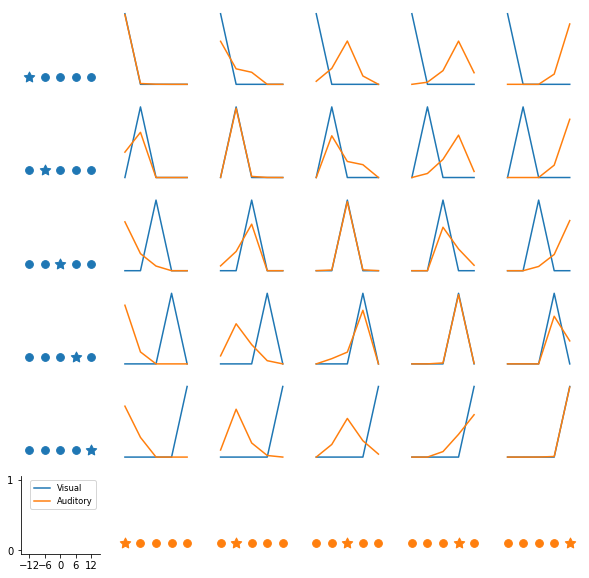

CPU times: user 3.03 s, sys: 26.1 ms, total: 3.06 s
Wall time: 3.07 s


In [32]:
%%time
# Default parameters for experimental data
_, _, n_v, n_a = make_button_presses(samples=10000) #, plot=False)
experiment = [n_v, n_a]

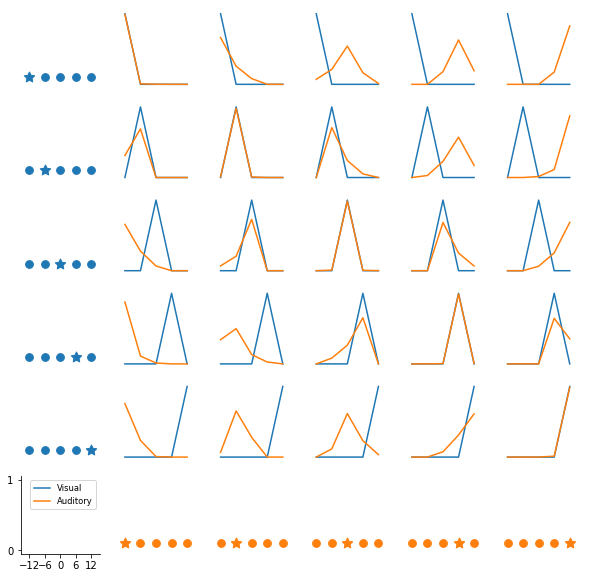

CPU times: user 3.73 s, sys: 58.3 ms, total: 3.79 s
Wall time: 3.89 s


In [33]:
%%time
# Default parameters for experimental data
_, _, n_v_pro, n_a_pro = make_button_presses_pro(samples=10000) #, plot=False)
experiment_pro = [n_v_pro, n_a_pro]

The experimental data set is obtained with the function make_button_presses(). The plots obtained use the design of figure 2c from Körding et al., 2007, where the normalized estimates are shown. 

The run time of our algorithm is high given the most_bautiful_plot parameter is set as True. Without the plots, the efficiency improves to ~75 ms for $10^5$ samples. Given our computational cost is above the desire implementation, we tried to optimize the algorithm by avoiding "for" loops in the make_button_presses_pro() function. Sadly, our "optimized" implementation costs twice as the original one. We assumed that the np.histogram() function is very costly when specifying a lot of bins.

### Numerical properties of the generative model

In [34]:
def log_likelihood(p_v, p_a, n_v, n_a):
    """
    Computes eq. 16 of Körding et al., 2007
    Overall log likelihood
    """
    
    log_v = np.multiply(np.log(p_v+1e-20), n_v).sum()
    log_a = np.multiply(np.log(p_a+1e-20), n_a).sum()
    
    return log_v + log_a
    #return log_v, log_a

In [35]:
def fit_model(experiment, samples=100000, sigma_v=sigma_v0, sigma_a=sigma_a0, sigma_p=sigma_p0, p_com=p_com0):
    """
    Ten times more than exp.
    """
    p_v, p_a, _, _ = make_button_presses(samples, sigma_v, sigma_a, sigma_p, p_com, plot=False)
    log_lik = log_likelihood(p_v, p_a, *experiment)
    return log_lik

In [36]:
def fit_model_pro(experiment, samples=100000, sigma_v=sigma_v0, sigma_a=sigma_a0, sigma_p=sigma_p0, p_com=p_com0):
    """
    Ten times more than exp.
    """
    p_v, p_a, _, _ = make_button_presses_pro(samples, sigma_v, sigma_a, sigma_p, p_com, plot=False)
    log_lik = log_likelihood(p_v, p_a, *experiment)
    return log_lik

In [37]:
%%time
# Default parameters for model
log0 = fit_model(experiment)

CPU times: user 84.6 ms, sys: 18.2 ms, total: 103 ms
Wall time: 107 ms


The maximum likelihood method is used to find the best parameter estimates. We assume that a population has certain true parameters and that the samples we draw from this population follow the same distribution. In this project, the samples under investigation are the "experimental" data, whereas the population is unknown and its true parameters need to be estimated using simulations. We do so by simulating different populations (one population is one set of parameters) and by computing their log-likelihoods that tell us how likely it is to observe the "exprimental" data given the simulated population. In general the population needs to be much larger than the size of the samples (here, the experimental data). Therefore, the log_likelihood function requires at least 10 times more samples than the experimental data. 

### Test using different parameters

In [38]:
%%time
# Tweeked parameters
log = fit_model(experiment, sigma_v=10.5, sigma_a=15.5, sigma_p=2, p_com=0.1)

CPU times: user 64.5 ms, sys: 11.8 ms, total: 76.2 ms
Wall time: 79.2 ms


In [39]:
%%time
p_coms = np.linspace(0, 1, 11)
sigma_vs = np.linspace(0, 20, 12)[1:]
sigma_as = sigma_vs.copy()
sigma_ps = sigma_vs.copy()
logs_pc = np.zeros(p_coms.shape)
logs_sv = logs_pc.copy()
logs_sa = logs_pc.copy()
logs_sp = logs_pc.copy()

for i, p_com in enumerate(p_coms):
    logs_pc[i] = fit_model(experiment, p_com=p_com)
    logs_sv[i] = fit_model(experiment, sigma_v=sigma_vs[i])
    logs_sa[i] = fit_model(experiment, sigma_a=sigma_as[i])
    logs_sp[i] = fit_model(experiment, sigma_p=sigma_ps[i])  
    
parameters = [p_coms[:-1], sigma_vs, sigma_as, sigma_ps[1:]]
true_paras = [p_com0, sigma_v0, sigma_a0, sigma_p0]

CPU times: user 3.8 s, sys: 444 ms, total: 4.24 s
Wall time: 4.41 s


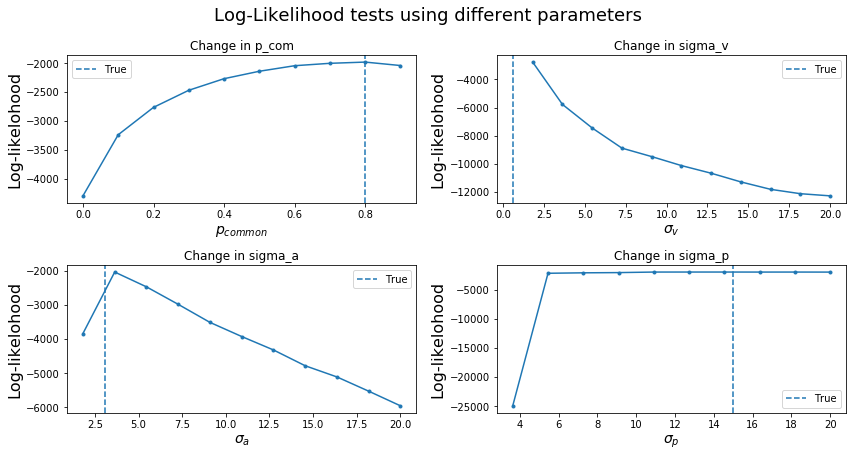

In [40]:
xlabels = [r'$p_{common}$', r'$\sigma_v$', r'$\sigma_a$', r'$\sigma_p$']

fig, axes = plt.subplots(2,2, figsize=(12,6))
axes = axes.ravel()
labels = ["p_com", "sigma_v", "sigma_a", "sigma_p"]
for i, logs in enumerate([logs_pc[:-1], logs_sv, logs_sa, logs_sp[1:]]):
    axes[i].plot(parameters[i], logs, '.-')
    axes[i].set_title("Change in "+ str(labels[i]))
    axes[i].axvline(x=true_paras[i], linestyle='dashed', label="True")
    axes[i].set_xlabel(xlabels[i], size=14)
    axes[i].set_ylabel(r"Log-likelohood", size=16)
    axes[i].legend()
plt.suptitle("Log-Likelihood tests using different parameters", y=1.05, size=18)
plt.tight_layout()
plt.show()

#### Look into numerical aspects of log_likelihood function

If the parameters are very accurate for a given stimulus (e.g. low $\sigma$ values), the histograms will output zeros for buttons further away from the position of the given stimulus. The output of the log-likelihood function for a zero value yields $-\infty$. This is due to the nature of the logarithm. To handle these cases, the paper suggests to add a small constant (in our case $10^{-20}$) to all values passed into the log_likelihood function. This only has an effect on numbers that are close to zero, but would not affect numbers significantly larger than zero.

Another exception arises when the $\sigma_p$ is small, because the estimates are going to have a high central bias, resulting in no responses at all for certain conditions. This yields a zero count for the histograms and then, when computing the probabilities will output NaN. To handle these cases correctly we added a new clause into make_button_presses(), where the Zero Division Errors are avoid by adding an array of zeros without entering the np.histogram() function.

By exploring the log-likelihood function with different sets of parameters we obtained a good idea of its manifold in the parameter space. First of all, we always obtain values smaller than zero. Second, because the logarithm is a monotonically increasing function, both the likelihood and log-likelihood  functions will achieve the maximum value at the same point. However, computing the likelihood function is costly in our case; we need the product of the probabilities for each response in a given condition ($s_v, s_a$) (refer to equation 15 of Körding et al., 2007). Using the log-likelihood would transform these products into sums, making it less costly while still maximizing the likelihood.

### Fitting - naïve approach

In [41]:
def grid_search(parameters, Number=1000):
    p_coms, sigma_vs, sigma_as, sigma_ps = parameters
    logs = np.zeros((len(p_coms), len(sigma_vs), len(sigma_as), len(sigma_ps)))
    count = 0
    for i, p_com in enumerate(p_coms):
        for j, sigma_v in enumerate(sigma_vs):
            for k, sigma_a in enumerate(sigma_as):
                for l, sigma_p in enumerate(sigma_ps):
                    if count%Number == 0:
                        print('%d trials finished' %count)
                    logs[i,j,k,l] = fit_model(experiment, sigma_v=sigma_v, sigma_a=sigma_a, sigma_p=sigma_p, p_com=p_com)
                    count += 1
    return logs

In [42]:
# grid search coarse
p_coms =  np.arange(0, 1.1, 0.1)#[1:]
sigma_vs = np.arange(0, 20, 2.0)
sigma_vs[0] = 0.1
sigma_as = sigma_vs.copy()
sigma_ps = sigma_vs.copy()

grob_params = [p_coms, sigma_vs, sigma_as, sigma_ps]
true_params = [p_com0, sigma_v0, sigma_a0, sigma_p0]

In [43]:
%%time

logs_grob = grid_search(grob_params)

0 trials finished
1000 trials finished
2000 trials finished
3000 trials finished
4000 trials finished
5000 trials finished
6000 trials finished
7000 trials finished
8000 trials finished
9000 trials finished
10000 trials finished
CPU times: user 12min 9s, sys: 1min 3s, total: 13min 12s
Wall time: 13min 20s


In [44]:
index = np.where(logs_grob == logs_grob.max())
index_grob = []
finer_params = []

for i, idx in enumerate(index):
    j = idx[0]
    index_grob.append(j)
    if i==0:
        finer_params.append([grob_params[0][index_grob[0]]])
    elif i>0:
        if j==0:
            finer_params.append(np.arange(grob_params[i][j], grob_params[i][j]+1, 0.1))    

        else:
            finer_params.append(np.arange(grob_params[i][j]-1, grob_params[i][j]+1, 0.2))    

In [45]:
%%time

logs_fine = grid_search(finer_params, 100)

0 trials finished
100 trials finished
200 trials finished
300 trials finished
400 trials finished
500 trials finished
600 trials finished
700 trials finished
800 trials finished
900 trials finished
CPU times: user 1min 6s, sys: 4.67 s, total: 1min 10s
Wall time: 1min 11s


In [46]:
index = np.where(logs_fine == logs_fine.max())
index_max = []
params_max = []
#for g, h in enumerate(index_grob):
for i, idx in enumerate(index):
    j = idx[0]
    index_max.append(j)
    params_max.append(finer_params[i][j])
    print("Coarse param: %.4f" %grob_params[i][index_grob[i]])
    print("Finer param: %.4f" %finer_params[i][j])
    print("True param: %.4f" %true_params[i])

Coarse param: 0.8000
Finer param: 0.8000
True param: 0.8000
Coarse param: 0.1000
Finer param: 0.1000
True param: 0.6000
Coarse param: 4.0000
Finer param: 3.2000
True param: 3.1000
Coarse param: 16.0000
Finer param: 15.8000
True param: 15.0000


After running a coarse and a fine grid search we obtained parameters that are close to those of the experimental data.
$p_{common}$ is exactly found, $sigma_v$, $sigma_a$ and $sigma_p$ are within less than one unit range.

However the best possible parameters would have been exactly the true ones, so no, we didn't find them. A more detail grid search will be need it for closer approximation, but it will add the computational cost (already at ~15 min) and will not guarantee an optimal solution, as the model uses noisy stimuli, and certain randomness is always in the model.  

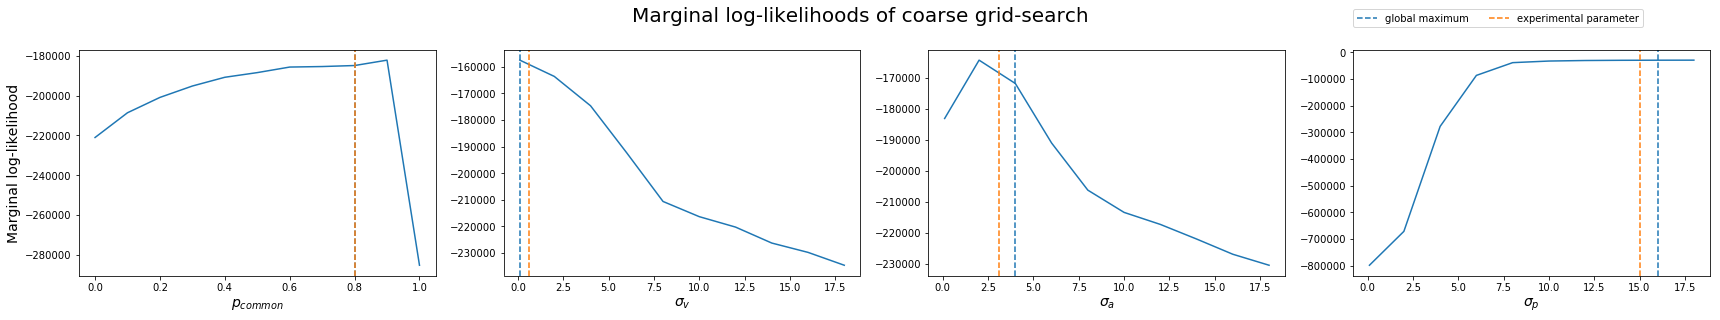

In [47]:
xlabels = [r'$p_{common}$', r'$\sigma_v$', r'$\sigma_a$', r'$\sigma_p$']

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
axes = axes.ravel()
for i in range(len(axes)):
    axis_tuple = list(range(4))
    axis_tuple.remove(i)
    #print(i)
    axes[i].plot(grob_params[i], logs_grob.mean(axis=tuple(axis_tuple)))
    axes[i].axvline(x=grob_params[i][index_grob[i]], linestyle='dashed', label='global maximum')
    axes[i].axvline(x=true_params[i], linestyle='dashed', color='C1', label='experimental parameter')
    axes[i].set_xlabel(xlabels[i], size=14)
axes[0].set_ylabel('Marginal log-likelihood', size=14)
axes[-1].legend(loc=(0, 1.1), ncol=2)
fig.suptitle('Marginal log-likelihoods of coarse grid-search', size=20, y=1.1)
plt.tight_layout()
plt.show()

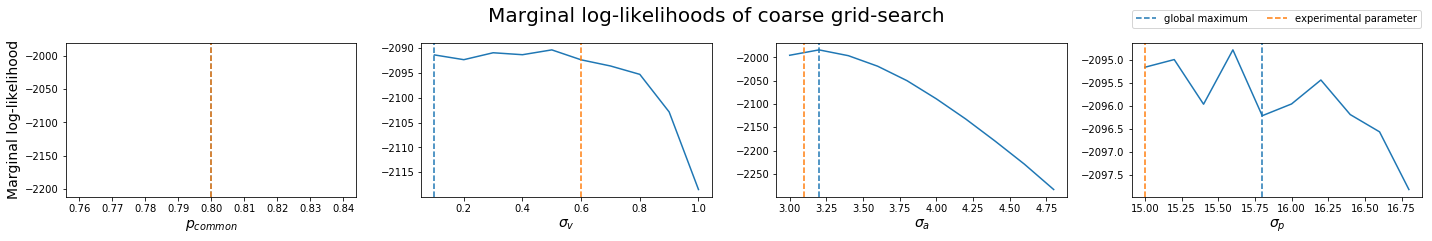

In [48]:
xlabels = [r'$p_{common}$', r'$\sigma_v$', r'$\sigma_a$', r'$\sigma_p$']

fig, axes = plt.subplots(1, 4, figsize=(20, 3))
axes = axes.ravel()
for i in range(len(axes)):
    axis_tuple = list(range(4))
    axis_tuple.remove(i)
    axes[i].plot(finer_params[i], logs_fine.mean(axis=tuple(axis_tuple)))
    axes[i].axvline(x=finer_params[i][index_max[i]], linestyle='dashed', label='global maximum')
    axes[i].axvline(x=true_params[i], linestyle='dashed', color='C1', label='experimental parameter')
    axes[i].set_xlabel(xlabels[i], size=14)
#    axes[i].set_xlim(0, coarse_params[i][-1])
axes[0].set_ylabel('Marginal log-likelihood', size=14)
axes[-1].legend(loc=(0, 1.1), ncol=2)
fig.suptitle('Marginal log-likelihoods of coarse grid-search', size=20, y=1.1)
plt.tight_layout()
plt.show()

The best parameters can't be identified using only the marginals. 

### Fitting - MCMC approach

In [49]:
import emcee
import corner

In [50]:
def lnprior(params):
    p_com, sigma_v, sigma_a, sigma_p = params
    if 0 <= p_com <= 1 and 0.0 < sigma_v < 20.0 and 0.0 < sigma_a < 20.0 and 0.0 < sigma_p < 20.0:
        return 0.0
    return -np.inf

In [51]:
def lnprob(params, samples, experiment):
    lp = lnprior(params)
    p_com, sigma_v, sigma_a, sigma_p = params    
    if not np.isfinite(lp):
        return -np.inf
    return lp + fit_model(experiment, samples, sigma_v=sigma_v, sigma_a=sigma_a, sigma_p=sigma_p, p_com=p_com)

In [52]:
ndim, nwalkers = 4, 32
iters = 1000
samples = 100000 #10e5
xxx = [[0.5, 10, 10, 10] + 1e-1*np.random.randn(ndim) for i in range(nwalkers)]

In [53]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(samples, experiment))

In [54]:
%%time
sampler.run_mcmc(xxx, iters)

CPU times: user 33min 3s, sys: 3min 10s, total: 36min 14s
Wall time: 36min 30s


(array([[  0.77244239,   0.60910074,   3.10352547,  12.69199763],
        [  0.77900158,   0.56053257,   3.10525687,  15.16141736],
        [  0.77590099,   0.46642725,   3.12848349,  15.17171308],
        [  0.77338113,   0.25163837,   3.09202001,  13.47750524],
        [  0.75988211,   0.48136716,   3.12802371,  13.6255261 ],
        [  0.81329444,   0.09906143,   3.07965749,  12.44260638],
        [  0.80927006,   0.27260884,   3.07743271,  11.27049053],
        [  0.77749228,   0.55049638,   3.18297809,  13.51249318],
        [  0.77519265,   0.21805809,   3.11255216,  15.61486837],
        [  0.81161015,   0.64030384,   3.07643149,  12.09511749],
        [  0.7803383 ,   0.46600895,   3.06785111,  14.18409097],
        [  0.77699798,   0.64155504,   3.08838698,  14.6032562 ],
        [  0.73427826,   0.34261191,   3.16189882,  17.22435505],
        [  0.78872957,   0.29511256,   3.0869803 ,  16.34586665],
        [  0.78644002,   0.14957211,   3.20557061,  13.16594185],
        [ 

In [55]:
samples_corner = sampler.chain[:, 50:, :].reshape((-1, ndim))

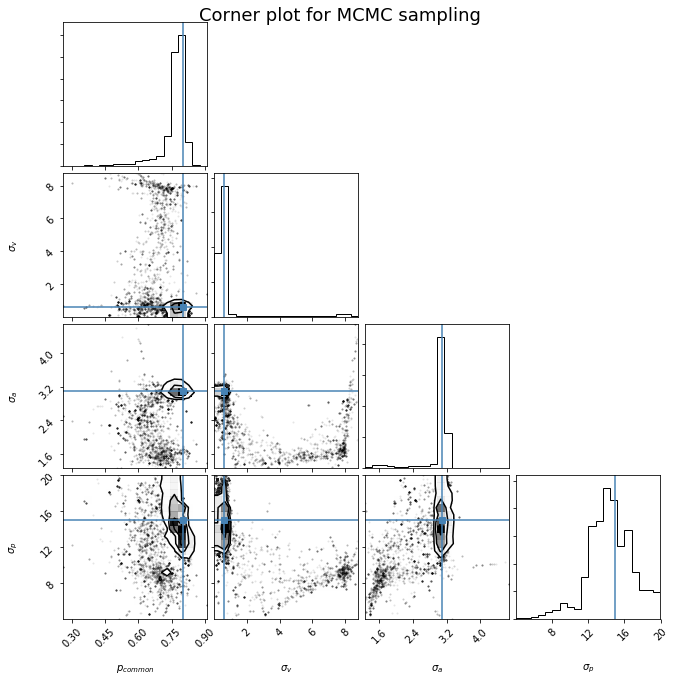

In [56]:
fig = corner.corner(samples_corner, labels=xlabels, truths=true_params)
fig.suptitle('Corner plot for MCMC sampling', size=18)
plt.show()

### Compare accuracy

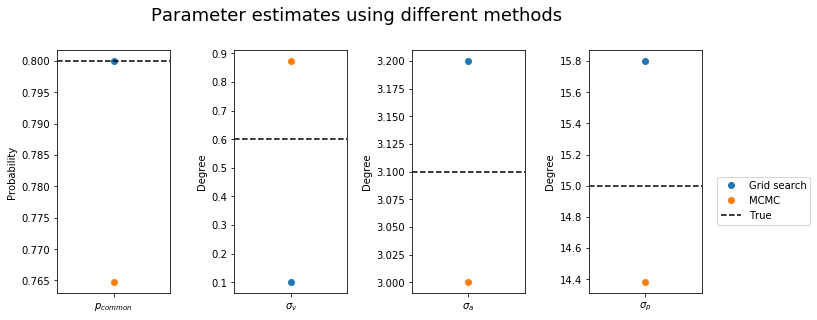

In [61]:
ylabels = ['Probability', 'Degree', 'Degree', 'Degree']

fig, axes = plt.subplots(1, 4, figsize=(10,4))
for i, ax in enumerate(axes):
    ax.plot(params_max[i], 'o', label='Grid search')
    ax.plot(samples_corner.mean(axis=0)[i], 'o', label='MCMC')
    ax.axhline(y=true_params[i], linestyle='dashed', color='black', label="True")
    ax.set_xticks([0])
    ax.set_xticklabels([xlabels[i]])
    ax.set_ylabel(ylabels[i])
axes[-1].legend(bbox_to_anchor=(2, 0.5))
plt.suptitle("Parameter estimates using different methods", y=1.1, size=18)
plt.tight_layout()
plt.show()

### Two subjects 

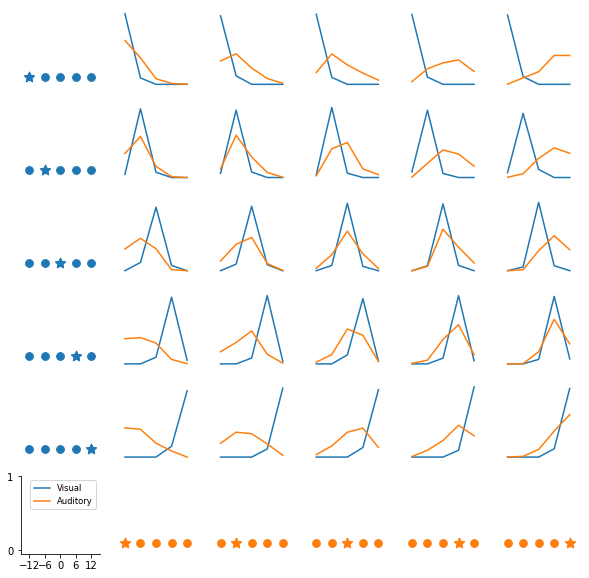

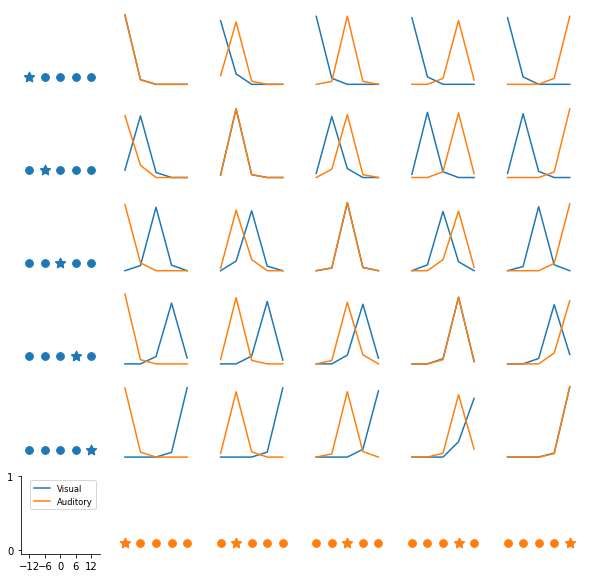

In [62]:
true_params1 = [0.3, 2.1, 9, 12]
true_params2 = [0.3, 2.1, 2, 12]

_, _, n_v, n_a  = make_button_presses(sigma_v=2.1, sigma_a=9, sigma_p=12, p_com=0.3)
experiment1 = [n_v, n_a]

_, _, n_v, n_a  = make_button_presses(sigma_v=2.1, sigma_a=2, sigma_p=12, p_com=0.3)
experiment2 = [n_v, n_a]

In [67]:
sampler1 = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(samples, experiment1))
sampler2 = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(samples, experiment2))

In [68]:
%%time
sampler1.run_mcmc(xxx, iters)
sampler2.run_mcmc(xxx, iters)

CPU times: user 1h 14min 30s, sys: 5min 33s, total: 1h 20min 3s
Wall time: 1h 56min 12s


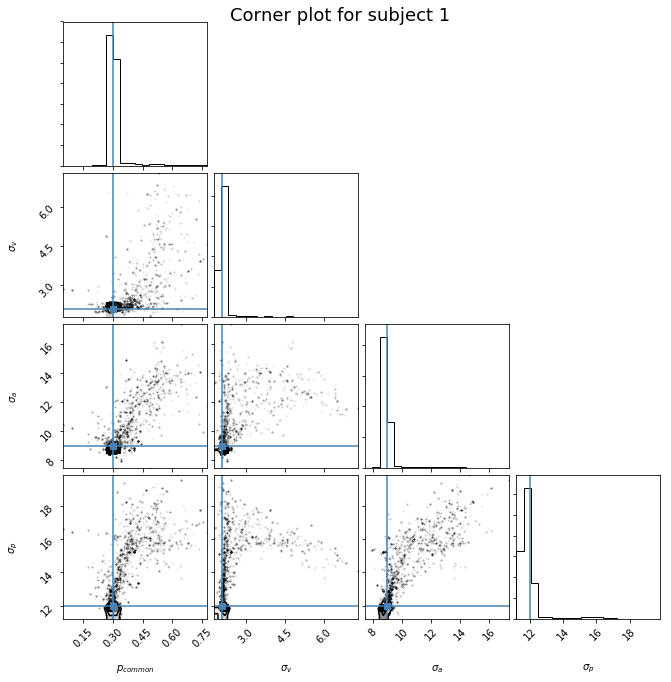

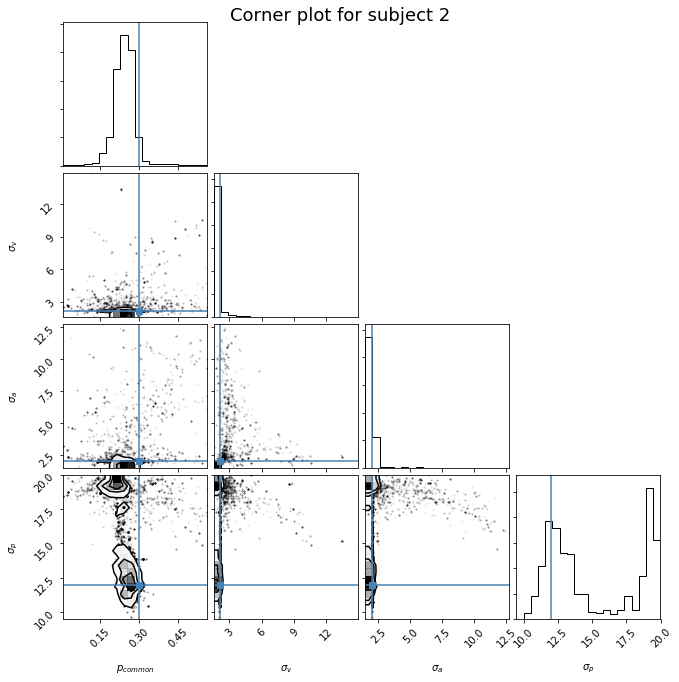

In [69]:
samples_corner1 = sampler1.chain[:, 50:, :].reshape((-1, ndim))
samples_corner2 = sampler2.chain[:, 50:, :].reshape((-1, ndim))

fig1 = corner.corner(samples_corner1, labels=xlabels, truths=true_params1)
fig2 = corner.corner(samples_corner2, labels=xlabels, truths=true_params2)
fig1.suptitle('Corner plot for subject 1', size=18)
fig2.suptitle('Corner plot for subject 2', size=18)
plt.show()

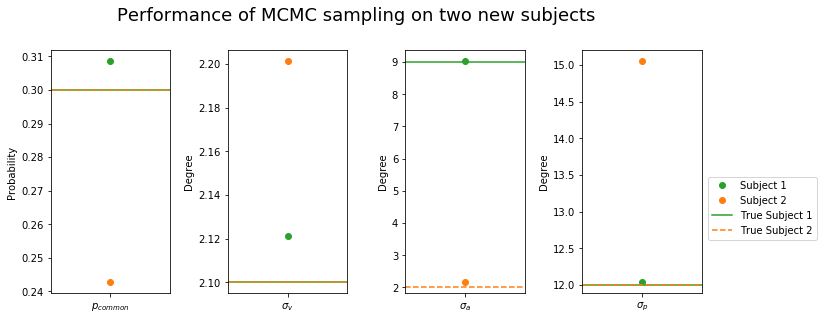

In [70]:
fig, axes = plt.subplots(1, 4, figsize=(10,4))
for i, ax in enumerate(axes):
    ax.plot(samples_corner1.mean(axis=0)[i], 'C2o', label='Subject 1')
    ax.plot(samples_corner2.mean(axis=0)[i], 'C1o', label='Subject 2')
    ax.axhline(y=true_params1[i], color='C2', label="True Subject 1")
    ax.axhline(y=true_params2[i], linestyle='dashed', color='C1', label="True Subject 2")
    ax.set_xticks([0])
    ax.set_xticklabels([xlabels[i]])
    ax.set_ylabel(ylabels[i])
axes[-1].legend(bbox_to_anchor=(2, 0.5))
plt.suptitle("Performance of MCMC sampling on two new subjects", y=1.1, size=18)
plt.tight_layout()
plt.show()

In [96]:
np.log(0.5+1e-20)

-0.69314718055994529